In [1]:
#Import necessory Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import  matplotlib.pyplot as plt
import seaborn as sns

# List all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv


# US ACCIDENTS EXPLORATORY DATA ANALYSIS- START YEAR - END YEAR
TODO - Talk about EDA\
TODO - Talk about the dataset (Source, what it contains, how it will be useful)\
 -Kaggle\
 -Information about accidents\
 -Can be useful to prevent accidents


## DATA IMPORT

In [2]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv')

## DATA PREPARATION AND CLEANING

In [3]:
print('Shape of the dataset =',df.shape)
print('Top 5 rows')
print(df.head(5))

Shape of the dataset = (2845342, 47)
Top 5 rows
    ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 

In [4]:
print('Bottom 5 rows')
print(df.tail(5))

Bottom 5 rows
                ID  Severity           Start_Time             End_Time  \
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
2845337   34.00248 -117.37936  33.99888 -117.37094         0.543   
2845338   32.76696 -117.14806  32.76555 -117.15363         0.338   
2845339   33.77545 -117.84779  33.77740 -117.85727         0.561   
2845340   33.99246 -118.40302  33.98311 -118.39565         0.772   
2845341   34.13393 -117.23092  34.13736 -117.23934         0.537   

                                               Description  ...  Roundabout  \
2845337                           At Market St - Acci

In [5]:
#Name of Columns
print('Name of Columns = ',df.columns)
#Number of columns
print('Number of columns: ',len(df.columns))

Name of Columns =  Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
Number of columns:  47


In [6]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
#Describe the dataset
df.describe().astype(int)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2845342,2845342,2845342,2845342,2845342,2845342,1101431,2776068,2375699,2772250,2786142,2774796,2687398,2295884
mean,2,36,-97,36,-97,0,8089,61,59,64,29,9,7,0
std,0,5,18,5,18,1,18360,18,21,22,1,2,5,0
min,1,24,-124,24,-124,0,0,-89,-89,1,0,0,0,0
25%,2,33,-118,33,-118,0,1270,50,46,48,29,10,3,0
50%,2,36,-92,36,-92,0,4007,64,63,67,29,10,7,0
75%,2,40,-80,40,-80,0,9567,76,76,83,30,10,10,0
max,4,49,-67,49,-67,155,9999997,196,196,100,58,140,1087,24


In [8]:
#df.Sunrise_Sunset.value_counts()
df.Civil_Twilight.head(110)

0      Night
1      Night
2      Night
3      Night
4        Day
       ...  
105      Day
106      Day
107      Day
108      Day
109      Day
Name: Civil_Twilight, Length: 110, dtype: object

In [9]:
#select only numeric columns
numeric_df = df.select_dtypes(include = 'number')
numeric_df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

### Handling Missing values

In [10]:
null_values = df.isna()
perc_null_values = null_values.sum().sort_values(ascending = False)*100/len(df)
perc_null_values.round()

Number                   61.0
Precipitation(in)        19.0
Wind_Chill(F)            17.0
Wind_Speed(mph)           6.0
Wind_Direction            3.0
Humidity(%)               3.0
Weather_Condition         2.0
Visibility(mi)            2.0
Temperature(F)            2.0
Pressure(in)              2.0
Weather_Timestamp         2.0
Airport_Code              0.0
Timezone                  0.0
Nautical_Twilight         0.0
Civil_Twilight            0.0
Sunrise_Sunset            0.0
Astronomical_Twilight     0.0
Zipcode                   0.0
City                      0.0
Street                    0.0
Country                   0.0
Junction                  0.0
Start_Time                0.0
End_Time                  0.0
Start_Lat                 0.0
Turning_Loop              0.0
Traffic_Signal            0.0
Traffic_Calming           0.0
Stop                      0.0
Station                   0.0
Roundabout                0.0
Railway                   0.0
No_Exit                   0.0
Crossing  

<AxesSubplot:>

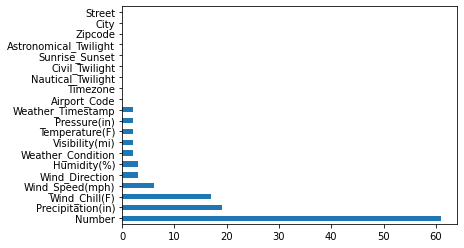

In [11]:
non_zero_perc_null_values = perc_null_values[perc_null_values != 0]
non_zero_perc_null_values.round().plot(kind = 'barh')

## EXPLORATORY ANALYSIS AND VISUALISATION

## ASK AND ANSWER QUESTIONS

1. Are there more accidents in warmer or colder areas
2. Which 5 states have the highest number of accidents? How about per capita?


## SUMMARY AND CONCLUSION